# OpenCV를 이용해 이미지 자르기 

### OpenCV 및 NumPy 배열 슬라이싱으로 이미지 자르기 이해
* [넘파이 array slicing](http://scipy-lectures.org/intro/numpy/array_object.html)

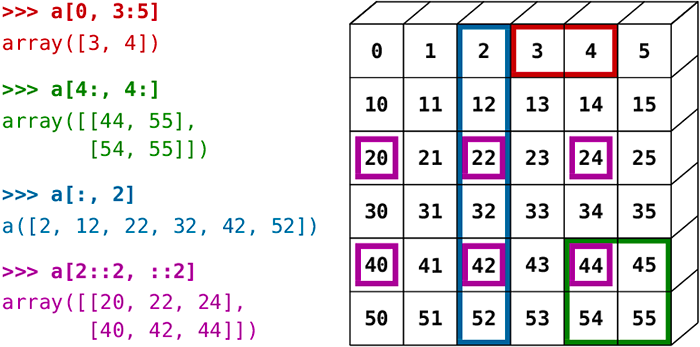

In [ ]:
from IPython.display import Image
Image("https://www.pyimagesearch.com/wp-content/uploads/2021/01/opencv_cropping_numpy_slicing.png")

#### Read Eval Print Loop

In [2]:
import numpy as np
my = np.arange(0, 25)
I = my.reshape((5, 5))  # (5, 5)의 2차원으로 변경
display(I, I.shape, I.ndim)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

(5, 5)

2

In [5]:
# x = 0, y = 0에서 시작하여 x=2, y=3에서 끝나는 `픽셀`추출한다고 가정
display(I[0:3, :2])

array([[ 0,  1],
       [ 5,  6],
       [10, 11]])

In [6]:
display(I[3:5, 1: 5])

array([[16, 17, 18, 19],
       [21, 22, 23, 24]])

### 이미지 다운로드 

In [7]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-cropping/opencv-cropping.zip
!unzip -qq opencv-cropping.zip
%cd opencv-cropping

--2021-04-21 15:23:18--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-cropping/opencv-cropping.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.246.1
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.246.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 336317 (328K) [application/zip]
Saving to: ‘opencv-cropping.zip’

opencv-cropping.zip 100%[===================>] 328.43K  1.28MB/s    in 0.3s    

2021-04-21 15:23:18 (1.28 MB/s) - ‘opencv-cropping.zip’ saved [336317/336317]

/content/opencv-cropping


## 코드 작성 및 실행

### 패키지 임포트 

In [8]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imutils
import argparse

### 코랩 및 주피터에서 수행 가능토록 변경

In [9]:
def plt_imshow(title, image):
  import cv2
  """
  이미지를 BGR에서 RGB로 변환하고 화면에 표출
  """
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  plt.title(title)
  plt.imshow(image)
  plt.grid(True); plt.show()

### OpenCV를 통해 보는 numpy의 array slicing.



In [10]:
I = np.arange(0, 25)
display(I)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [11]:
I = I.reshape((5, 5))
display(I)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [12]:
display(I[0:3, 0:2], I[3:5, 1:5])

array([[ 0,  1],
       [ 5,  6],
       [10, 11]])

array([[16, 17, 18, 19],
       [21, 22, 23, 24]])

### OpenCV를 이용한 이미지 자르기
* [사물탐지](https://www.pyimagesearch.com/category/object-detection/)
* [얼굴탐지](https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/)
* ROI(Region of Interest) = 이미지 [ startY : endY, startX : endX ]

In [13]:
# 파이썬 스크립트로 만들어진 .py를 터미널에서 수행가능토록 함
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, default="adrian.png",
# 	help="path to the input image")
# args = vars(ap.parse_args())

# 쥬피터 혹은 코랩에서 가능
args = {
	"image": "adrian.png"
}

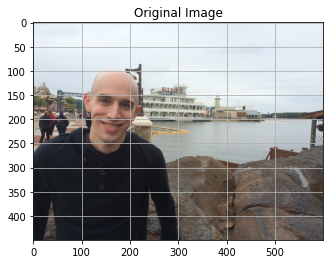

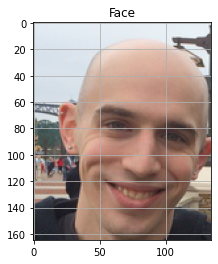

In [14]:
# 사진 로드 및 화면 표출
image = cv2.imread(args['image'])
plt_imshow("Original Image", image)

# ROI(Region of Interest) = image[ startY(시작높이점) : endY(종료높이점), startX(시작너비점) : endX(종료너비점) ]
face = image[85:250, 85:220]  # 배열로 이루어진 픽셀의 정보를 가져온다.
plt_imshow("Face", face)

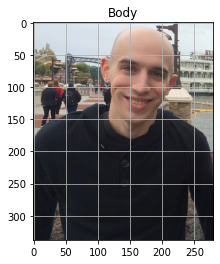

In [16]:
# 얼굴을 포함한 상체만 잘라오기
body = image[91:429, 0:280]
plt_imshow("Body", body)

### 강아지 사진에 머리부분만 짜르기 

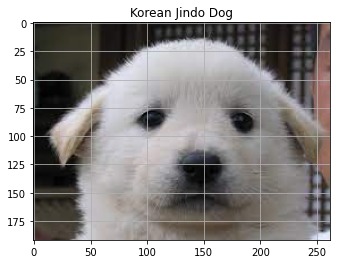

In [18]:
args = {
    'image': '/content/opencv-cropping/dog.jpg'
}
dogs = cv2.imread(args['image'])
plt_imshow("Korean Jindo Dog", dogs)

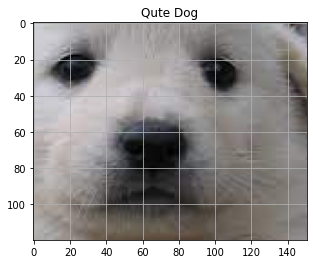

In [21]:
dog_face = dogs[60:180, 82:233]
plt_imshow("Qute Dog", dog_face)